## Group 1 - Project 4: Fetal Health Classification ##

### Background: ###

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Source: [Kaggle](https://www.kaggle.com/andrewmvd/fetal-health-classification?select=fetal_health.csv)

### Problem Statement: ###

We are going to be classifying fetal health into 3 classes. We are trying to understand what indicates normal, suspect, or pathological infant health based on cardiotocogram results, which will help medical professionals take the appropriate action to reduce child mortality rates. There are 9 features and 2126 observations.

### Data Cleaning ###

In [67]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB


In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('./fetal_health.csv')

In [4]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_min  \
0                                  2.4             64.0           62.0   
1                                 10.4            130.0           68.0   
2                                 13.4            130.0           68.0   
3                                 23.0            117.0           53.0   
4                                 19.9            117.0           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0

In [5]:
df.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

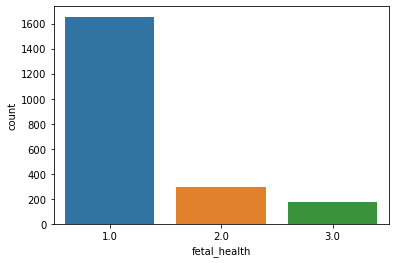

In [6]:
sns.countplot(data= df, x = 'fetal_health');

In [7]:
df['fetal_health'].value_counts(normalize=True)

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

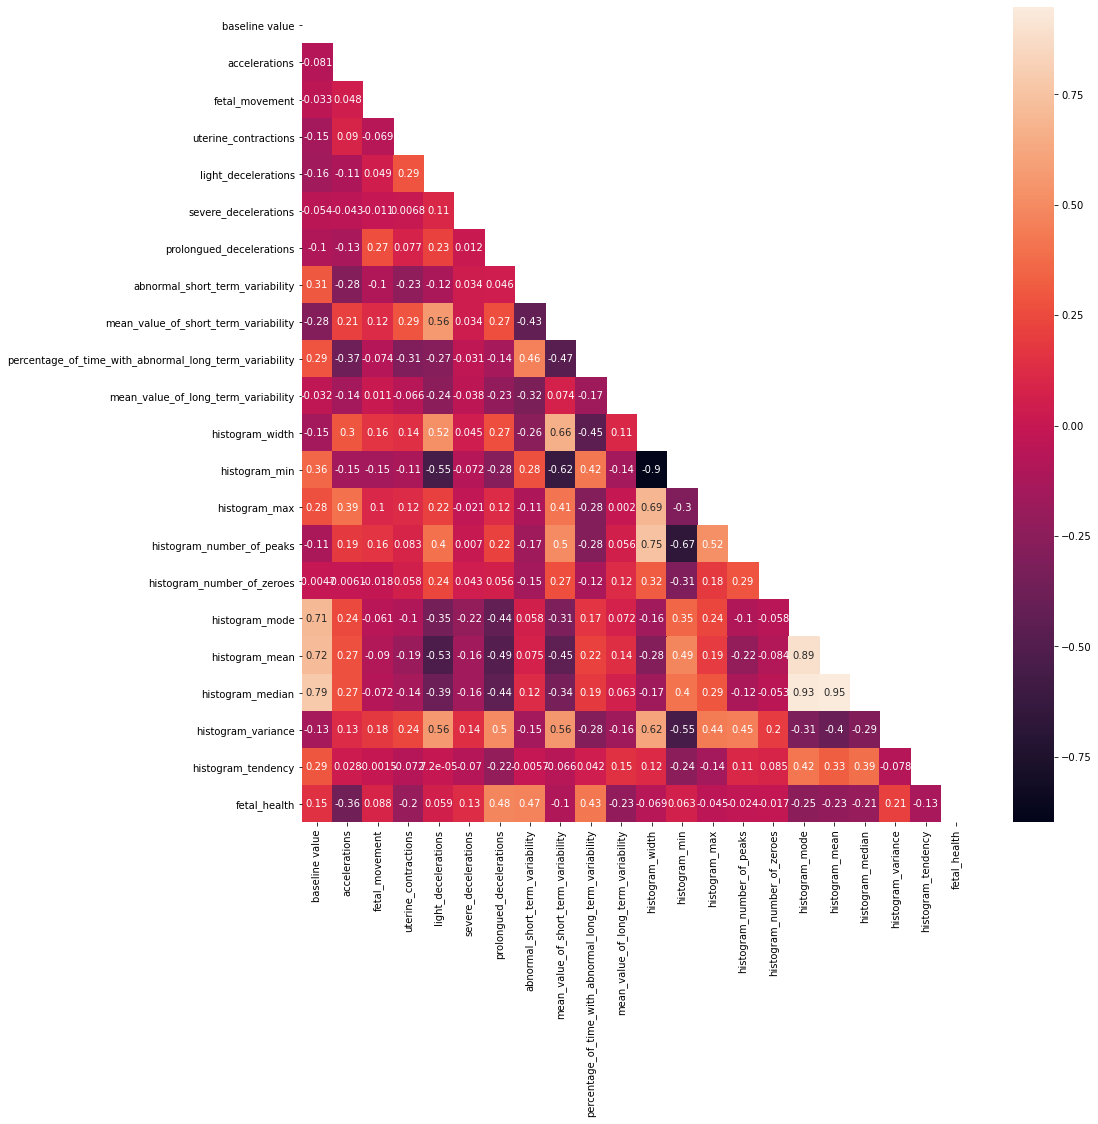

In [8]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, mask=mask);

In [9]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

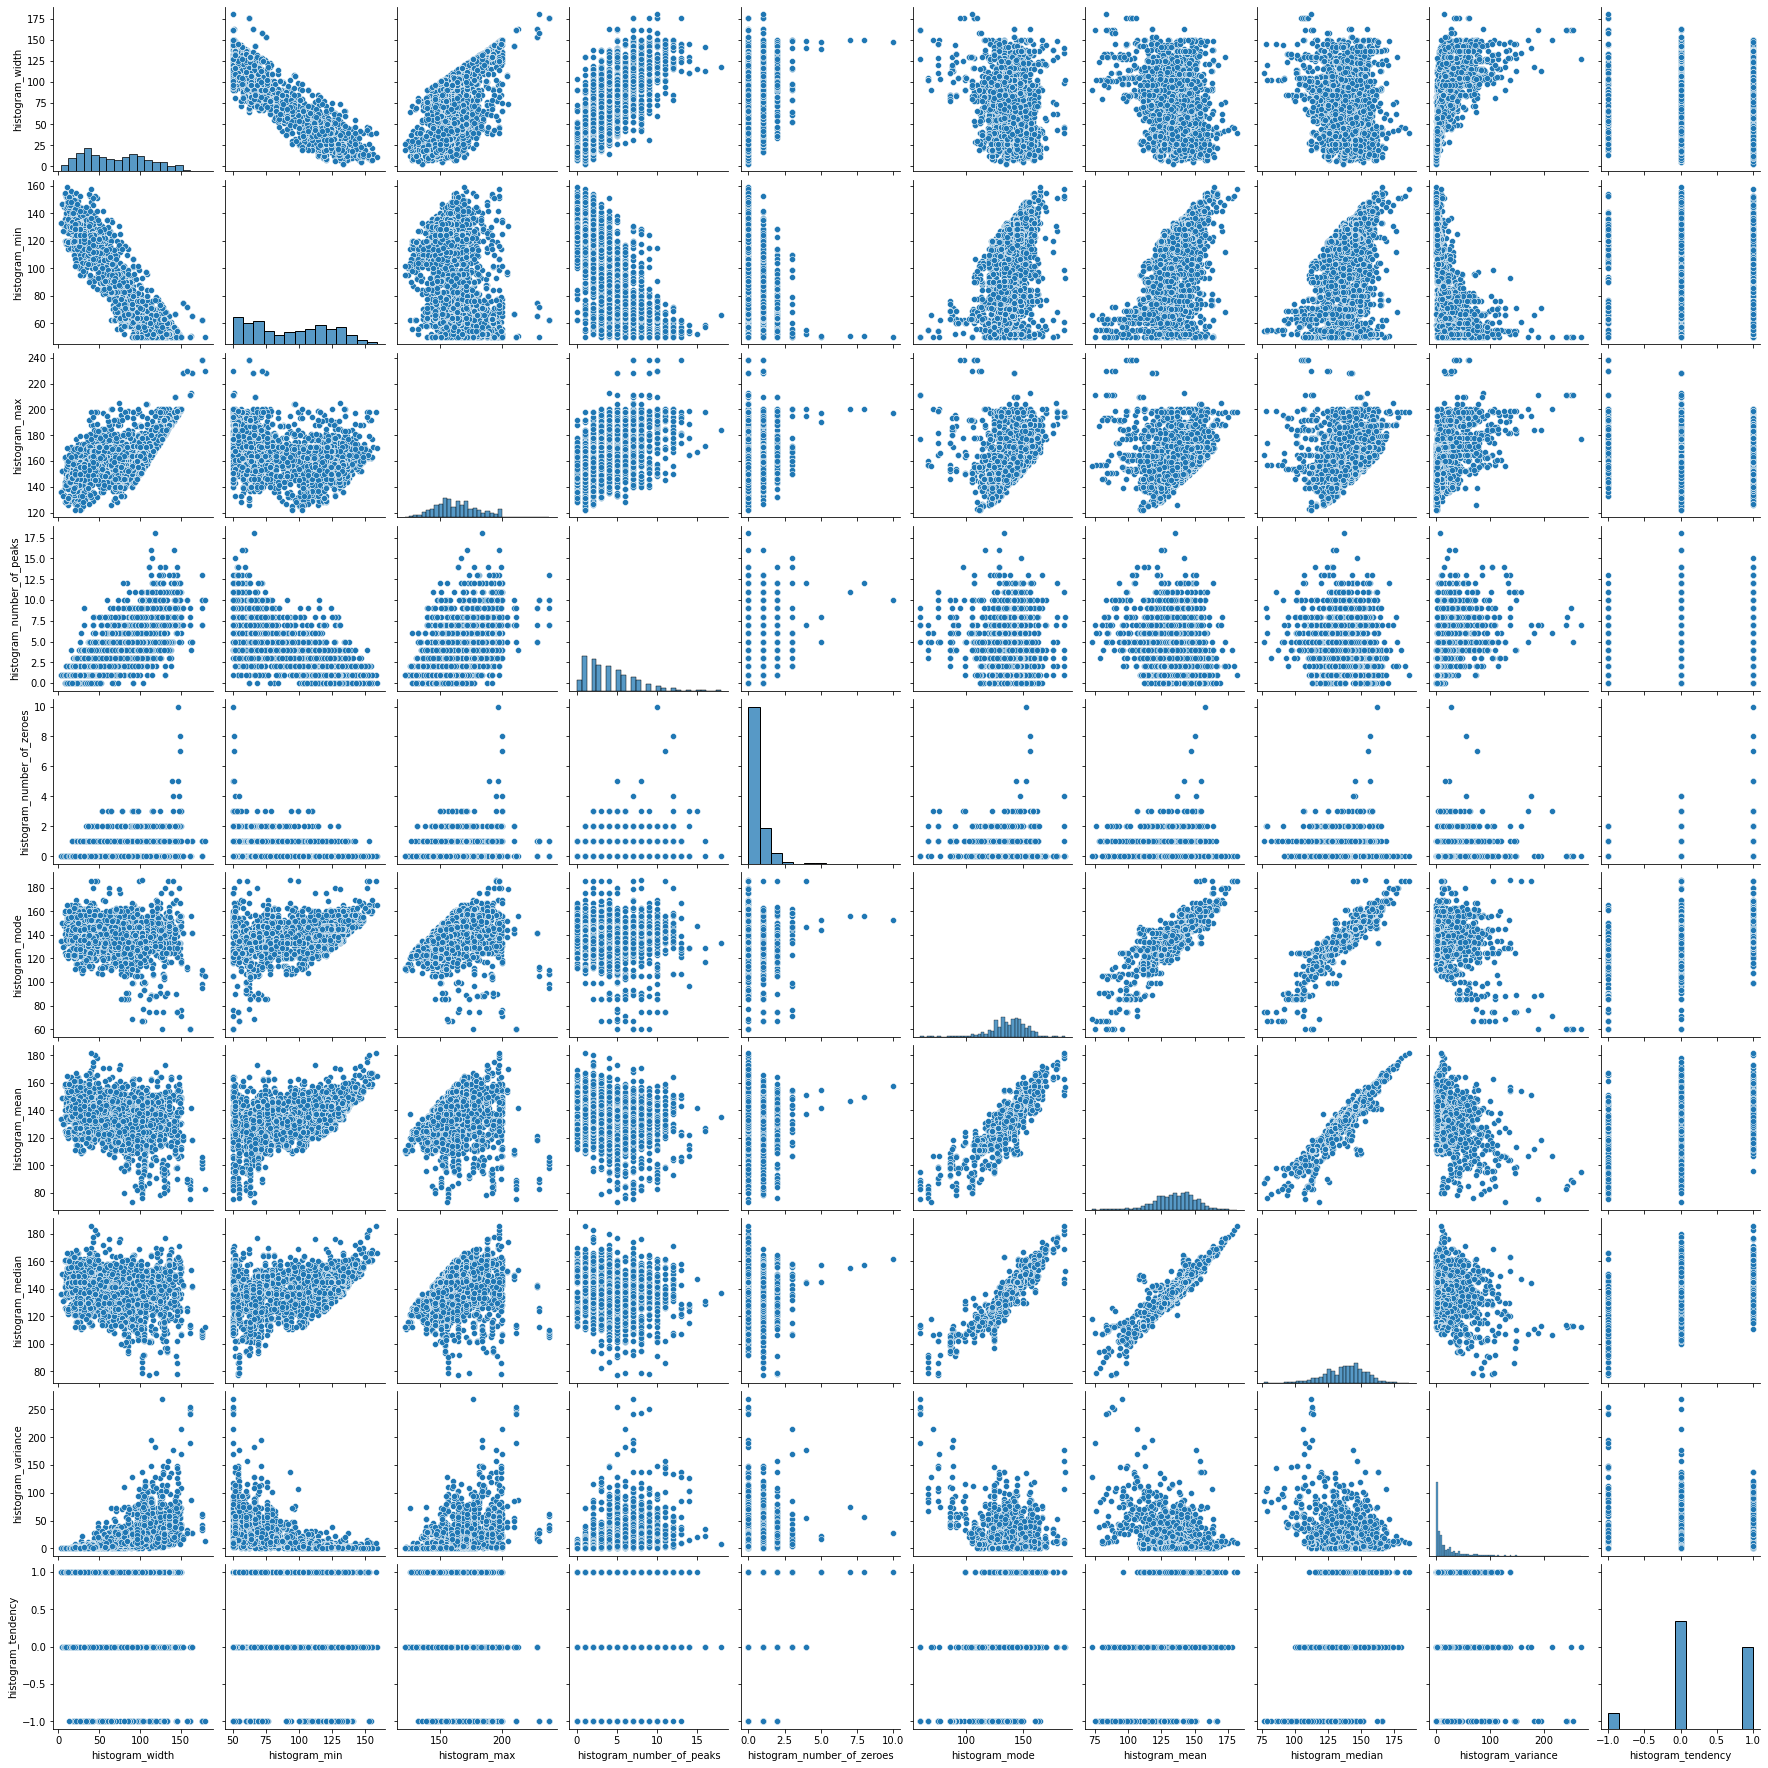

In [10]:
sns.pairplot(data = df[['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]);

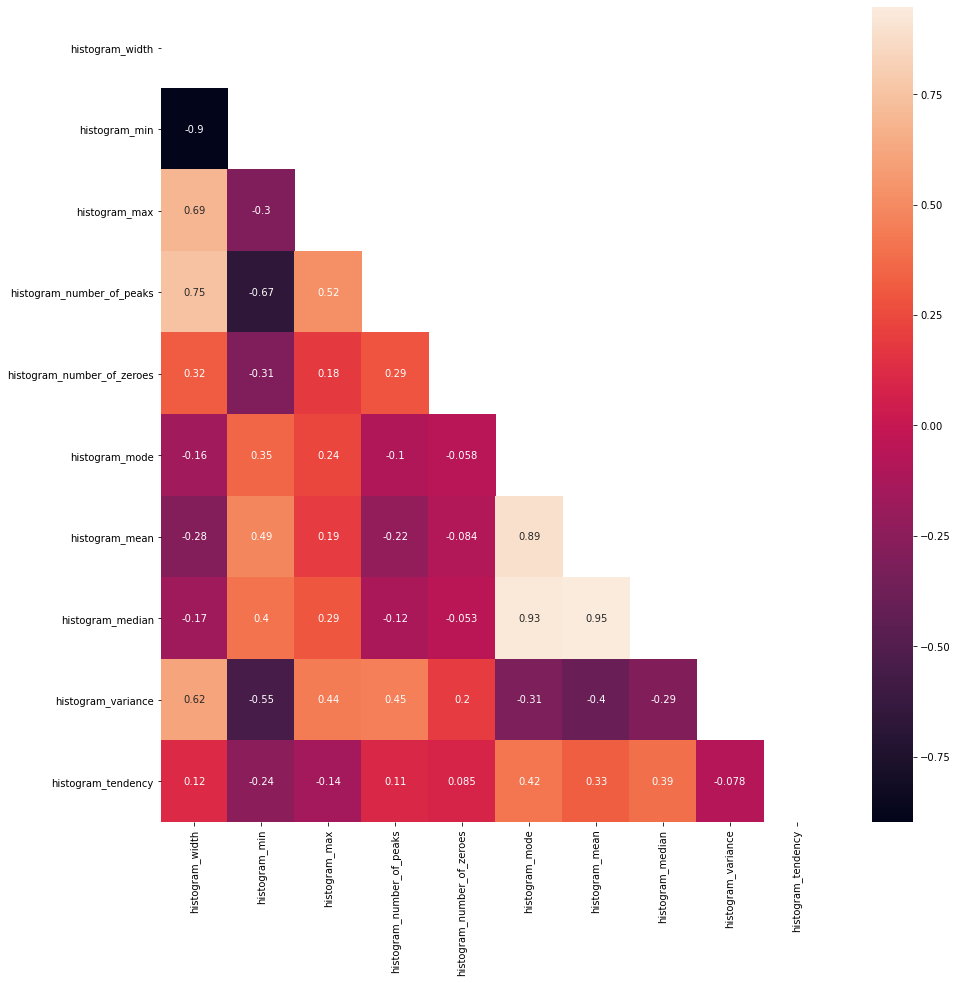

In [11]:
mask = np.zeros_like(df[['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']].corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,15))
sns.heatmap(df[['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']].corr(), annot=True, mask=mask);

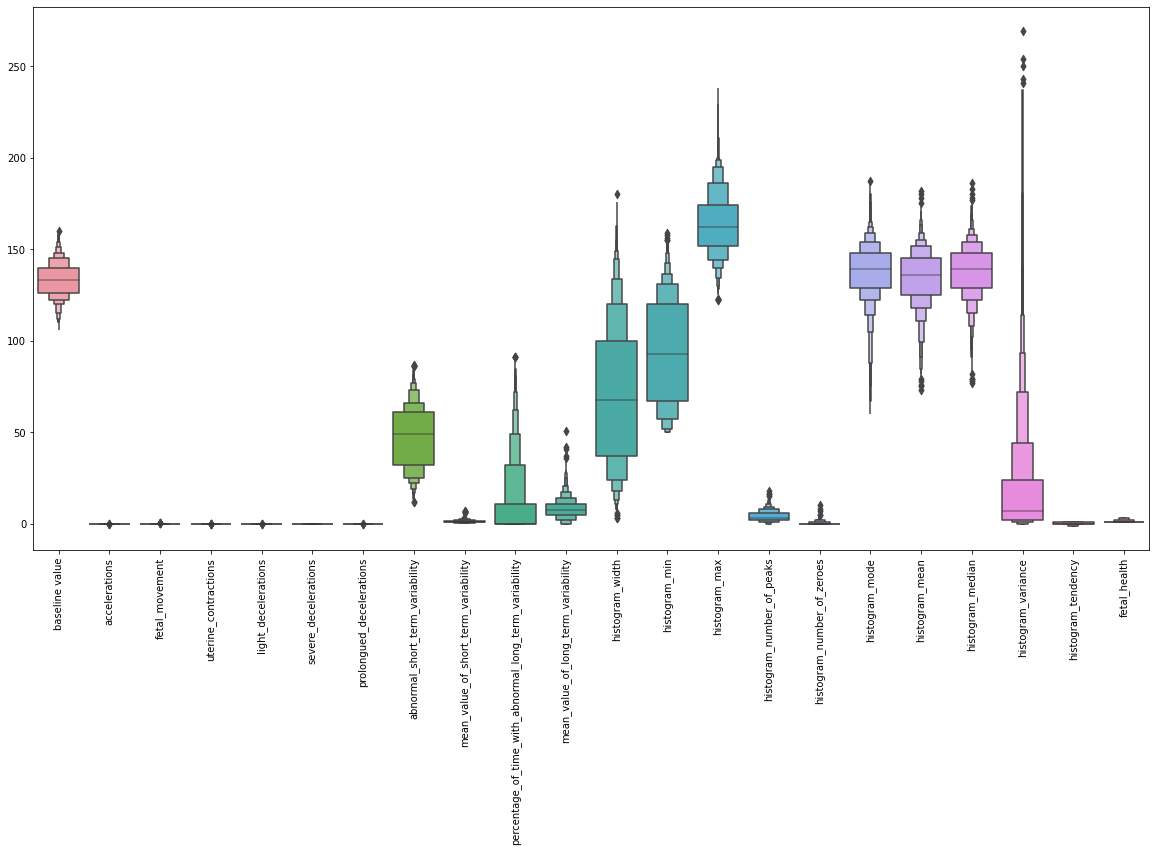

In [12]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = df)
plt.xticks(rotation=90);


### Modeling ###

In [13]:
X = df.drop(columns=['fetal_health'])

y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1, stratify = y )

In [14]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [15]:
def pipe(model):
    #instantiate model
    model = model()
    #fit to scaled data
    model.fit(X_train_sc, y_train)
    
    #make predictions
    predictions = model.predict(X_test_sc)

    #print results
    print(f'{model} training score: {model.score(X_train_sc, y_train)}')
    print(f'{model} testing score: {model.score(X_test_sc, y_test)}')

    return

In [16]:
pipe(LogisticRegression)

LogisticRegression() training score: 0.8977415307402761
LogisticRegression() testing score: 0.9078947368421053


In [17]:
pipe(DecisionTreeClassifier)

DecisionTreeClassifier() training score: 0.998745294855709
DecisionTreeClassifier() testing score: 0.9135338345864662


In [19]:
pipe(SVC)

SVC() training score: 0.9240903387703889
SVC() testing score: 0.9191729323308271


In [21]:
logreg = LogisticRegression()

logreg.fit(X_train_sc, y_train)

predictions = logreg.predict(X_test_sc)

print(f'training score: {logreg.score(X_train_sc, y_train)}')
print(f'testing score: {logreg.score(X_test_sc, y_test)}')

training score: 0.8977415307402761
testing score: 0.9078947368421053


In [23]:
pipe(GradientBoostingClassifier)

GradientBoostingClassifier() training score: 0.9949811794228356
GradientBoostingClassifier() testing score: 0.9492481203007519


In [24]:
pipe(AdaBoostClassifier)

AdaBoostClassifier() training score: 0.9084065244667503
AdaBoostClassifier() testing score: 0.8853383458646616


In [25]:
pipe(XGBClassifier)

/Users/afsara/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) training sc

In [26]:
pipe(RandomForestClassifier)

RandomForestClassifier() training score: 0.998745294855709
RandomForestClassifier() testing score: 0.9454887218045113


### Models to further tune:
    
-Extra Trees: Julia

-SVC: Katie

-Gradient Boost: Rachael

-Random Forest: Afsara

#### Random Forests w Grid Search

In [60]:
rfc = RandomForestClassifier(n_jobs = 3)
rfc_params = {
    'n_estimators' : [400, 500],
    'max_features' : ['auto'],
    'max_depth' :  [15, 30]
}

gs = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=5)
gs.fit(X_train_sc, y_train)
print(f'training score: {gs.score(X_train_sc, y_train)}')
print(f'testing score: {gs.score(X_test_sc, y_test)}')
gs.best_params_

training score: 0.998745294855709
testing score: 0.9398496240601504


{'max_depth': 30, 'max_features': 'auto', 'n_estimators': 400}

In [64]:
preds = gs.predict(X_test_sc)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       414
         2.0       0.89      0.66      0.76        74
         3.0       0.98      0.98      0.98        44

    accuracy                           0.94       532
   macro avg       0.94      0.87      0.90       532
weighted avg       0.94      0.94      0.94       532

[[408   5   1]
 [ 25  49   0]
 [  0   1  43]]


In [65]:
cm = confusion_matrix(y_test, preds)

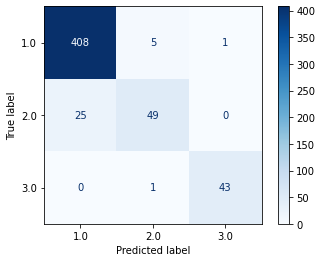

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = gs.classes_)
disp.plot(cmap = 'Blues');

In [89]:
# Chose gradient boosting as final classifier for streamlit.